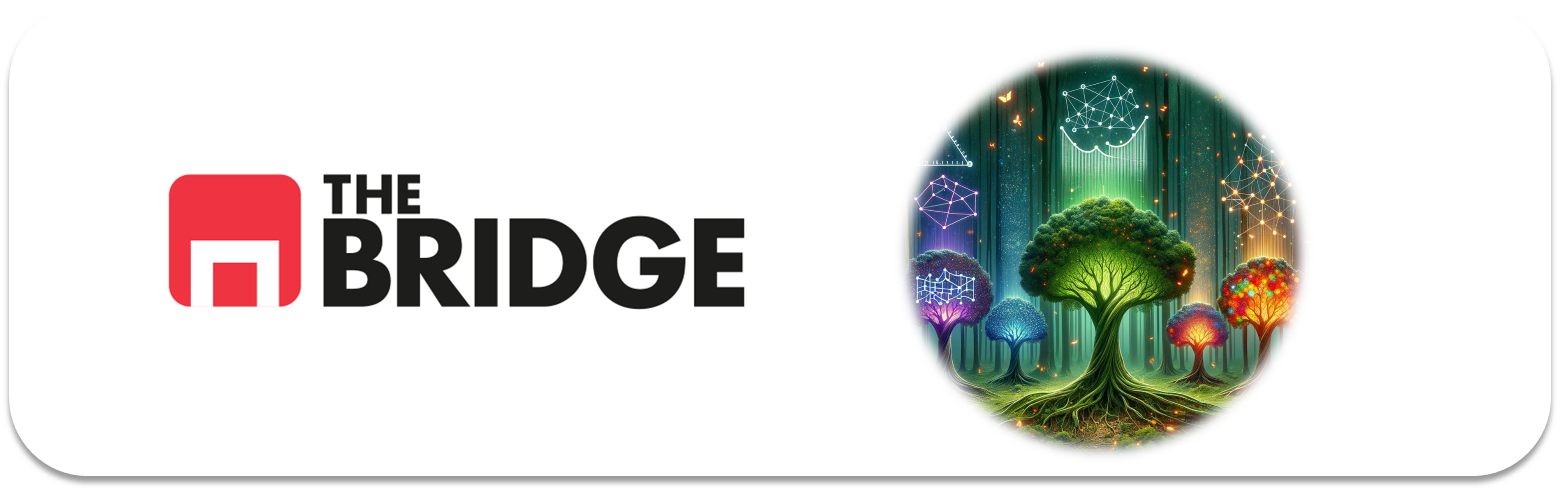

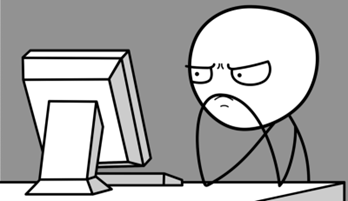

Para ejercitarte y afianzar lo aprendido sobre **Clasificacion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# para que la salida de este notebook sea estable en todas las ejecuciones
np.random.seed(42)

# Pintar!
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



### Ejercicio 1

Genera un conjunto de datos de lunas usando 

```python
make_moons(n_samples=10000, noise=0.4)
```

La función make_moons se encuentra en el módulo `datasets` de `sklearn`. Juega con ella para ver qué tipo de datos genera, y  crea un X_moons y un y_moons. Visualiza las moons con un scatter plot de las dos features de X_moons. (ojo X_moons es un array de numpy de dos dimesiones para acceder a la primera X_moons[:,0] y para la segunda...)

In [42]:
from sklearn.datasets import make_moons

# X are the generated instances, an array of shape (500,2).
# y are the labels of X, with values of either 0 or 1.
X_moons, y_moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

# X_moons = make_moons(n_samples=10000, random_state=42)
# y_moons = make_moons(noise=0.4, random_state=42)

In [52]:
X_moons

array([[ 0.9402914 ,  0.12230559],
       [ 0.12454026, -0.42477546],
       [ 0.26198823,  0.50841438],
       ...,
       [-0.24177973,  0.20957199],
       [ 0.90679645,  0.54958215],
       [ 2.08837082, -0.05050728]])

In [44]:
y_moons

array([1, 0, 0, ..., 1, 0, 1])

In [34]:
len(y_moons)

2

<Axes: >

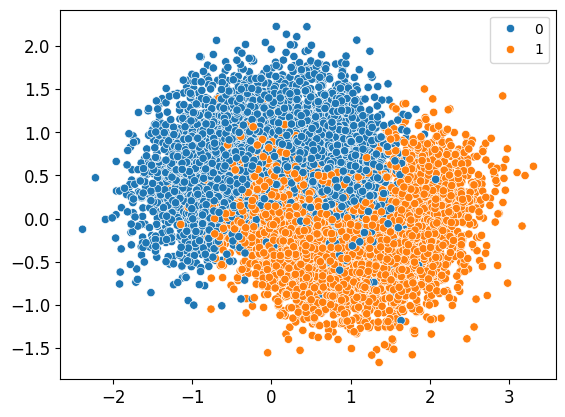

In [45]:
sns.scatterplot(x = X_moons[:,0], y = X_moons[:,1], hue = y_moons)

### Ejercicio 2

El objetivo de los modelos que vamos a ir construyendo es aprender a clasificar correctamente en cada "luna" (moon) a un punto dadas sus coordenadas. Para ello crea un par de juegos X,y para train y test al 20% de test a partir de los puntos generados en el ejercicio anterior.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size= 0.2, random_state= 42) 

### Ejercicio 3

Instancia un árbol de decisión de `sklearn` sin añadir hiperparámetros.

In [59]:
from sklearn.tree import DecisionTreeClassifier
#istanciamos el metodo clasificador
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Ejercicio 4

Entrena el árbol y evalúalo contra test, usa para ello el classification_report de `sklearn`

In [63]:
from sklearn.metrics import classification_report

y_pred= tree_clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1013
           1       0.81      0.82      0.81       987

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



### Ejercicio 5

Instancia un nuevo árbol con los hiperparámetros (argumentos del constructor), `max_depth` a 5 y `max_leaf_nodes` a 15. Busca en la documentación de `sklearn` el significado de ambos hiperparámetros.

In [66]:
tree_clf_h = DecisionTreeClassifier(max_depth=5, max_leaf_nodes= 15)
#max_depth: max numero de nodos-niveles 

#max_leaf_nodes : max_leaf_nodes: número máximo de nodos de hoja que puede tener un árbol de decisión 
tree_clf_h.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)

### Ejercicio 6

Entrénalo, evaluálo contra test y muestra el resultado a través del classification_report.

In [67]:
y_pred_h= tree_clf_h.predict(X_test)

print(classification_report(y_test, y_pred_h))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1013
           1       0.84      0.89      0.86       987

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



Comenta el resultado

*La mejor es sensible, debido a que el ajuste de hiperparámetros ha sido bastante bueno. En general los modelos basados en árboles necesitan un ajuste más fino que las regresiones (lineal, que apenas hay que hacer nada, y logística)*

### Ejercicio 7

Genera 1000 subconjuntos a partir del X_train, cada uno con 100 instancias seleccionadas aleatoriamente. Pista: Revisa la clase `ShuffleSplit` de `sklearn` para ayudarte con esto

In [81]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1000, test_size=100, random_state=0)
for train_index, test_index in ss.split(X_train):
    print("%s %s" % (train_index, test_index))

print(f"Número de subconjuntos generados: {len(train_index)}")


[5547 3803 7937 ... 1653 2607 2732] [3069 1675 6385  543 3213  134 5869 1425 1819 7492 5828 4749 6334 5387
 6303 2250 4587 5904 5476 2491  276 3480  273  162 2164 2756 7207   39
 7103 3197 4855 6406 7351 3790 3501  234 3343 6875 2980 4977 5165 1255
 2915 2542  257 2531  533 1742 1259 3740 5348 6284 1865 6169  574 5434
 6662 5782  882 1531 4046 2551 3598 3651 6005 5744  233 4673 2645 7474
  949 4016 6911  713 5306 3726 4273 1982 4831 2194 5260 4858 4973 6655
 7023 4220  394 2141   44 7648 4200 3243 2081 7305 3672 6228 1461 3184
  167 6441]
[2861 7391 2509 ... 2253 2026  710] [2553  547 1894 2560 2346 2650  775 4755 6556 6476  854 4144 1178  252
 1298 3494 2351  675 1070 3314 2221 7069  223 6597   84 5877 1783 6613
 4996 7158 4794 1273 4975 3619 6772  711 2092 6996 6914 1500 7825 7224
 3704 2505 7857 1568 2298 3480 2831 6167  924 5852 1927 5210 7542    4
 2476 5105 6718 2772 3935 5236  249 1228 1586 7557  517 3838 4137 3087
 2132 4944 4719 5781  324 7326 7088  992 7185 3341 7738 1017 174

### Ejercicio 8

Entrena un árbol de decisión por cada subconjunto anterior (ve acumulándolos en una lista, llámala "bosque" o "forest"). Emplea como hiperparámetros los del ejercicio 5.

In [83]:
bosque = []

ss = ShuffleSplit(n_splits=1000, test_size=100, random_state=0)
for train_index, test_index in ss.split(X_train):
    X_subset = X_train[test_index]
    y_subset = y_train[test_index]

    tree_clf_ss = DecisionTreeClassifier(max_depth=5, max_leaf_nodes= 15)
    tree_clf_ss.fit(X_subset, y_subset)
    bosque.append(tree_clf_ss)



In [84]:
len(bosque)

1000

### Ejercicio 9

Evalua cada árbol del bosque contra X_test original en la métrica de `accuracy` y muestra la media de todas las medidas. Emplea para ello `accuracy_score` de `sklearn`. Comenta el resultado.

In [86]:
from sklearn.metrics import accuracy_score

accuracy = []

# Evaluar cada árbol del bosque
for tree in bosque:
    # Realizar predicciones con el árbol
    y_pred_b = tree_clf_ss.predict(X_subset)
    
    # Calcular precisión y agregarla a la lista
    acc = accuracy_score(y_subset, y_pred_b)
    
acc   
# # Calcular la media de las precisiones
# mean_accuracy = np.mean(accuracy)

# # Mostrar el resultado
# print(f"Media de la métrica 'accuracy' en el bosque: {mean_accuracy:.4f}")

0.99

*Como era un poco de esperar un árbol entrenado con menor cantidad de datos no está a la altura de otro entrenado sobre el mismo dataset pero con mayor cantidad de información (81% vs 86%). Es lo que se denomina weak_learner*

### Ejercicio 10

Vamos a hacer un consejo de árboles... Es decir ahora vuelve a predecir las instancias de X_test para cada árbol pero guarda las predicciones en una lista. Es decir crea una lista con los 1000 conjuntos de predicciones (uno por cada árbol)

### Ejercicio 11

Ahora vamos a construir la predicción final del consejo de árboles mediante un mecanismo de "hard-voting" es decir para cada predicción escoge la clase más votada. Puedes hacerlo recorriendo cada lista de predicciones y contando cual clase tiene más votos y apuntándolo o usando `mode` (la moda) de `scipy`

In [ ]:
# Ejemplo de votación para la primera instancia de X_test
Y_pred_consejo = []
votos_0 = 0
votos_1 = 0
for i in range(n_trees):
    if predicciones_list[i][0] == 0:
        votos_0 += 1
    else:
        votos_1 += 1

if votos_0 > votos_1:
    Y_pred_consejo.append(0)
else:
    Y_pred_consejo.append(1)

### Ejercicio 12

Evalua las predicciones del consejo contra y_test y comenta el resultado. Utiliza `accuracy_score`